In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, roc_auc_score, f1_score, log_loss
from xgboost import XGBClassifier, DMatrix, train, cv
from sklearn.feature_selection import chi2

# **Overview Base**

### Carrega base

In [2]:
dados = pd.read_csv("train.csv", delimiter=',')

In [3]:
dados

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


### Verifica tamanho da base e resumo da distribuição das variáveis

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [5]:
dados.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


### Verificar se há valores missing padroes

In [6]:
#Verificando se ha valores missing padrao (None, NaN) na base como um todo 
dados.isnull().sum().sum()

0

### Verificar se há duplicação na base

In [7]:
dados_nodup = dados.drop_duplicates()
dados_nodup.shape

(76020, 371)

### Separa base de Treino e Teste e verificar proporção da Target

In [8]:
#Separa a base em 70% treino e 30% teste, estratificada pela TARGET, uma vez que ela nao tem uma proporcao equilibrada na base
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dados_nodup, test_size=0.3,stratify=dados_nodup['TARGET'],random_state=42)
train_set.shape, test_set.shape

((53214, 371), (22806, 371))

In [9]:
df = pd.DataFrame(train_set.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train_set.shape[0]
df

,TARGET,Percentage
0,51108,96.042395
1,2106,3.957605


In [10]:
df = pd.DataFrame(test_set.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/test_set.shape[0]
df

,TARGET,Percentage
0,21904,96.0449
1,902,3.9551


# **Tratamento da Base**

### Remove variáveis duplicadas

In [11]:
features = train_set.drop(['TARGET','ID'],axis=1)
corr_matrix = features.corr()
corr_matrix.shape

(369, 369)

In [12]:
#como a matriz de correlacao se repete na diagonal superior e inferior, escolhi uma delas 
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)) 

In [13]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] == 1)] 
print(to_drop)

['ind_var18', 'ind_var26', 'ind_var25', 'ind_var29_0', 'ind_var29', 'ind_var32', 'ind_var37', 'ind_var39', 'num_var18', 'num_var26', 'num_var25', 'num_var29_0', 'num_var29', 'num_var32', 'num_var37', 'num_var39', 'saldo_var29', 'delta_num_aport_var33_1y3', 'delta_num_reemb_var13_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_trasp_var17_in_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_in_1y3', 'delta_num_trasp_var33_out_1y3', 'delta_num_venta_var44_1y3']


In [14]:
print(len(to_drop))

25


In [15]:
features_1 = features.drop(to_drop, axis=1)
features_1.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
61553,2,38,48.0,102.0,209.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175887.150000
6865,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111297.030000
847,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
40817,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80805.900000
71630,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124585.620000


In [16]:
features_1.shape

(53214, 344)

### Remove variáveis constantes

In [17]:
#REMOVER VARIAVEIS CONSTANTES, OU SEJA, COM VARIANCIA ZERO

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(features_1)  # fit encontra variaveis com variancia zero
#get_support() eh um vetor que indica quais variaveis NAO tem variancia zero
to_drop_2 = [column for column in features_1.columns if column not in features_1.columns[sel.get_support()]] 
print(to_drop_2)

['ind_var2_0', 'ind_var2', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var13_medio_0', 'num_var13_medio', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var13_medio', 'saldo_var28', 'saldo_var27', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_amort_var34_ult1', 'imp_reemb_var13_hace3', 'imp_reemb_var17_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_meses_var13_medio_ult3', 'num_reemb_var13_hace3', 'num_reemb_var17_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo

In [18]:
print(len(to_drop_2))

57


In [19]:
features_2= features_1.drop(to_drop_2, axis=1)
features_2.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
61553,2,38,48.0,102.0,209.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175887.150000
6865,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111297.030000
847,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
40817,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80805.900000
71630,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124585.620000


In [20]:
features_2.shape

(53214, 287)

# **Feature Selection**

### Agrupa variáveis por nomes em comum

In [21]:
dict = {'full': features_2.columns}
colunas = pd.DataFrame(dict)

colunas['abv'] = colunas['full'].str.slice(0,3)
colunas

,full,abv
0,var3,var
1,var15,var
2,imp_ent_var16_ult1,imp
3,imp_op_var39_comer_ult1,imp
4,imp_op_var39_comer_ult3,imp
...,...,...
282,saldo_medio_var44_hace2,sal
283,saldo_medio_var44_hace3,sal
284,saldo_medio_var44_ult1,sal
285,saldo_medio_var44_ult3,sal


In [22]:
colunas.groupby('abv').count()

,full
abv,
del,15
imp,40
ind,54
num,115
sal,58
var,5


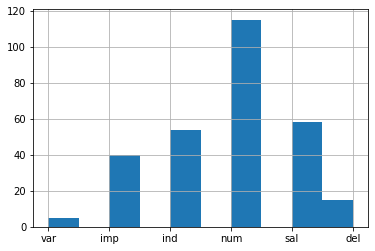

In [23]:
colunas.abv.hist()

### Separa variáveis em Binárias, Categóricas e Contínuas

In [24]:
#TENTAR DETERMINAR SE AS VARIAVEIS SAO BINARIAS, CATEGORICAS OU CONTINUAS

#PRIMEIRO VERIFICOU-SE A QUANTIDADE DE DOMINIOS DE CADA VARIAVEL DA BASE E TENTOU-SE AGRUPAR POR QUANTIDADE DE DOMINIOS
#BINARIAS: 2 DOMINIOS
#CATEGORICAS ATE 10 DOMINIOS: DE 3 A 10 DOMINIOS OU VARS COM INICIO DO NOME DA VARIAVEL NUM (TODAS ELAS PARECEM TER
# APENAS VALORES INTEIROS ATRAVES DO DESCRIBE), REMOVENDO VARIAVEIS COM VALORES NAO INTEIROS (ELAS SE TORNAM CONTINUAS)
#CONTINUAS: FOI FEITO UM TRABALHO DE VERIFICAR QUAL ERA UMA QUANTIDADE MINIMA DE DOMINIOS NECESSARIOS PARA A VARIAVEL
# DEIXAR DE SER CATEGORICA E SE TORNAR CONTINUA, INICIOU-SE O TESTE VERIFICANDO SE A QUANTIDADE DE DOMINIOS ERA MAIOR
# QUE N/2 E FOI-SE DIMINUINDO E VERIFICANDO QUAIS VARIAVEIS ALI TINHAM NOMES PARECIDOS, ALEM DE VERIFICAR SE O DESCRIBE
# MOSTRAVA VALORES QUEBRADOS OU VALORES INTEIROS.
#  VARS COM INICIO DO NOME DA VARIAVEL SALDO, IMP OU DELTA (-1 A 1)


#VETORES DE TESTE
vars_bin = []
vars_cat10 = []
vars_cont = []

vars_bin = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) == 2]

vars_cat10 = [columns for columns in features_2.columns 
              if columns not in vars_bin
              and len(features_2[columns].value_counts()) <= 10]
#vars_cont = [columns for columns in features_2.columns if len(features_2[columns].value_counts()) > 10 and len(features_2[columns].value_counts()) > int((features_2.shape[0])/500)]
vars_cont = [columns for columns in features_2.columns 
             if columns not in vars_bin 
             and columns not in vars_cat10]
print('#Binarias',len(vars_bin))
print('#Ate 10 categorias',len(vars_cat10))
print('#Continuas',len(vars_cont))
#APARENTEMENTE:
#BINARIAS: com 2 categorias
#CATEGORICAS: com 3 categorias
#CONTINUAS: SALDO ou IMP ou DELTA (-1 A 1)
#CATEGORICAS: NUM ou ate 10 categorias


#Binarias 80
#Ate 10 categorias 78
#Continuas 129


In [25]:
#VERIFICA SE AS VARIAVEIS CONSIDERADAS CATEGORICAS SAO INTEIROS NAO NEGATIVOS, CASO CONTRARIO, CHAMAR DE CONTINUAS

var_cat_true = []

var_cat_true = [columns for columns in features_2[vars_cat10].columns 
                if np.array_equal(features_2[columns], features_2[columns].astype(int))
                and np.array_equal(features_2[columns], abs(features_2[columns]))]
print(len(var_cat_true))

60


In [26]:
vars_to_cont = []

vars_to_cont = [columns for columns in features_2[vars_cat10].columns if columns not in var_cat_true]
print(len(vars_to_cont))

18


In [27]:
vars_cont_2 = []
vars_cat10_2 = []

vars_cont_2 = [columns for columns in features_2.columns if columns in vars_cont or columns in vars_to_cont]
vars_cat10_2 = [columns for columns in features_2[vars_cat10].columns if columns not in vars_to_cont]
print('#Binarias',len(vars_bin))
print('#Ate 10 categorias',len(vars_cat10_2))
print('#Continuas',len(vars_cont_2))

#Binarias 80
#Ate 10 categorias 60
#Continuas 147


### Verifica Associação de Variáveis Categóricas com a TARGET

##### Utiliza teste Chi-Squared para verificar associação entre Variáveis Categóricas e a TARGET

In [28]:
chi_scores = chi2(train_set[vars_cat10_2],train_set['TARGET'])

scores = pd.Series(chi_scores[0], index=vars_cat10_2)
pvalues = pd.Series(chi_scores[1], index=vars_cat10_2)

teste_chi = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})
teste_chi['associacao'] = teste_chi[teste_chi['p-Value'] <= 0.05]['p-Value']
teste_chi

,Chi2,p-Value,associacao
num_var1_0,2.056941,1.515141e-01,NaN
num_var4,245.491116,2.497193e-55,2.497193e-55
num_var5_0,7.597927,5.843544e-03,5.843544e-03
num_var5,987.652698,8.672433e-217,8.672433e-217
num_var8_0,375.266455,1.335196e-83,1.335196e-83
num_var12_0,85.862875,1.928557e-20,1.928557e-20
num_var12,156.720950,5.890152e-36,5.890152e-36
num_var13_0,240.497758,3.063180e-54,3.063180e-54
num_var13_corto_0,168.619793,1.481237e-38,1.481237e-38
num_var13_corto,171.138710,4.173166e-39,4.173166e-39


##### Remove Variáveis Categóricas sem associação estatisticamente significativa com a TARGET

In [29]:
to_drop_3 = []
to_drop_3 = [columns for columns in teste_chi[teste_chi['p-Value'] > 0.05].index]
print(len(to_drop_3))

20


In [30]:
vars_cat10_3 = []

vars_cat10_3 = [columns for columns in features_2[vars_cat10_2].columns if columns not in to_drop_3]
print('#Binarias',len(vars_bin))
print('#Ate 10 categorias',len(vars_cat10_3))
print('#Continuas',len(vars_cont_2))

#Binarias 80
#Ate 10 categorias 40
#Continuas 147


##### Utiliza teste Chi-Squared para verificar associação entre Variáveis Binárias e a TARGET

In [31]:
chi_scores = chi2(train_set[vars_bin],train_set['TARGET'])

scores = pd.Series(chi_scores[0], index=vars_bin)
pvalues = pd.Series(chi_scores[1], index=vars_bin)

teste_chi_bin = pd.DataFrame({'Chi2':scores, 'p-Value':pvalues})
teste_chi_bin['associacao'] = teste_chi_bin[teste_chi_bin['p-Value'] <= 0.05]['p-Value']
teste_chi_bin

,Chi2,p-Value,associacao
ind_var1_0,0.395146,5.296068e-01,NaN
ind_var1,7.387847,6.566605e-03,6.566605e-03
ind_var5_0,2.824111,9.285828e-02,NaN
ind_var5,330.017318,9.528301e-74,9.528301e-74
ind_var6_0,0.247241,6.190244e-01,NaN
...,...,...,...
num_trasp_var17_in_ult1,0.494482,4.819346e-01,NaN
num_trasp_var17_out_ult1,0.370862,5.425349e-01,NaN
num_trasp_var33_in_hace3,0.370862,5.425349e-01,NaN
num_trasp_var33_out_ult1,0.123621,7.251404e-01,NaN


##### Remove Variáveis Binárias sem associação estatisticamente significativa com a TARGET

In [32]:
to_drop_4 = []
to_drop_4 = [columns for columns in teste_chi_bin[teste_chi_bin['p-Value'] > 0.05].index]
print(len(to_drop_4))

35


In [33]:
vars_bin_2 = []

vars_bin_2 = [columns for columns in features_2[vars_bin].columns if columns not in to_drop_4]
print('#Binarias',len(vars_bin_2))
print('#Ate 10 categorias',len(vars_cat10_3))
print('#Continuas',len(vars_cont_2))

#Binarias 45
#Ate 10 categorias 40
#Continuas 147


In [34]:
features_3 = features_2.drop(to_drop_3, axis=1).drop(to_drop_4, axis=1)
features_3.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
61553,2,38,48.0,102.0,209.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,175887.150000
6865,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111297.030000
847,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
40817,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80805.900000
71630,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,124585.620000


### **Feature Importance - Random Forest**

In [35]:
#Separa X e Y de treino
x_train = []
y_train = []
x_train = train_set[features_3.columns]
y_train = train_set['TARGET']
x_train.shape, y_train.shape

((53214, 232), (53214,))

#### Define Funcao de Lucro (maximizar):

##### LUCRO = (-10 * FP)+(90 * TP)
##### Lucro Relativo = ((-10 * FP)+(90 * TP))/Lucro Máximo

In [36]:
def funcao_lucro(y_true, y_pred):

    cm = confusion_matrix(y_true, y_pred).ravel().tolist()
    fp = cm[1]
    tp = cm[3]

    lucro_max = sum(y_true)*90
    
    lucro_rel = ((-10*fp)+(90*tp))/lucro_max

    return lucro_rel

lucro = make_scorer(funcao_lucro, greater_is_better=True)

##### Lucro Maximo (100% acerto)

In [37]:
LM = sum(y_train)*90
print('Lucro Maximo: %.2f' % LM)

Lucro Maximo: 189540.00


#### Random Forest

##### Utiliza class_weight para dados desbalanceados

In [ ]:
#Como os dados nao sao balanceados
#Another approach to make random forest more suitable for learning from extremely imbalanced data follows the idea of cost
# sensitive learning. Since the RF classifier tends to be biased towards the majority class, we shall place a heavier penalty
# on misclassifying the minority class.
#class weight = balanced -> This argument takes a dictionary with a mapping of each class value (e.g. 0 and 1) to the weighting. The argument value of
# ‘balanced‘ can be provided to automatically use the inverse weighting from the training dataset, giving focus to the
# minority class.
#class_weight='balanced_subsample' -> Given that each decision tree is constructed from a bootstrap sample (e.g. random selection with replacement), the class
# distribution in the data sample will be different for each tree.
#As such, it might be interesting to change the class weighting based on the class distribution in each bootstrap sample,
# instead of the entire training dataset.

##### Modelo Base

In [38]:
rnd_clf = RandomForestClassifier(n_estimators = 10, class_weight='balanced_subsample',random_state=42)

scores = cross_val_score(rnd_clf, x_train, y_train, scoring='roc_auc', cv=10) #para classificacao o cv ja eh estratificado pela target

print('Media AUC: %.3f' % mean(scores))

Media AUC: 0.666


##### Grid Search: buscar hiperparametros melhores

In [39]:
#Foi testado 'n_estimators': [10,30,50] E 'max_depth': range(5,50,10) E 'max_features': ['sqrt','log2'] -> best = 50, 5, sqrt
#Foi testado 'n_estimators': [30,50,100] E 'max_depth': range(5,20,10) E 'max_features': ['sqrt','log2'] -> best = 100, 5, sqrt

grid_param = {
    'n_estimators': [30,50,100],
    'criterion': ['gini'], #default
    'max_depth': range(5,20,5),
    'max_features': ['sqrt','log2'],
    'class_weight':['balanced_subsample']
}

rnd_clf = RandomForestClassifier()

grid_search = GridSearchCV(rnd_clf,grid_param,scoring='roc_auc',cv=10)

grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [40]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [41]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [42]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(mean_score,params)

0.7995536832596603 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 30}
0.7991285021018586 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
0.80065430128667 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}
0.7858840570137732 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 30}
0.7869156062752173 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 50}
0.7860775139598913 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}
0.8013711114504247 {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 30}
0.8047666907857446 {'class

##### Modelo Otimizado

In [43]:
rnd_clf = RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 n_estimators = 100,
 class_weight = 'balanced_subsample', random_state=42)

scores = cross_val_score(rnd_clf, x_train, y_train, scoring='roc_auc', cv=10) #para classificacao o cv ja eh estratificado pela target

print('Media AUC: %.3f' % mean(scores))

Media AUC: 0.805


##### Verifica Feature Importance abaixo de limiar escolhido (0.01)

In [44]:
rnd_clf.fit(x_train,y_train)

feature_scores = pd.Series(rnd_clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)

feature_scores.to_csv('feature_importance.csv',header=False)

feature_scores

var15                           0.161481
saldo_var30                     0.050136
saldo_var5                      0.042791
saldo_medio_var5_hace3          0.041781
num_meses_var5_ult3             0.038807
                                  ...   
imp_trasp_var33_in_ult1         0.000000
num_var33_0                     0.000000
delta_imp_amort_var18_1y3       0.000000
num_venta_var44_ult1            0.000000
delta_imp_trasp_var17_in_1y3    0.000000
Length: 232, dtype: float64

In [45]:
(feature_scores <= 0.01).sum()

214

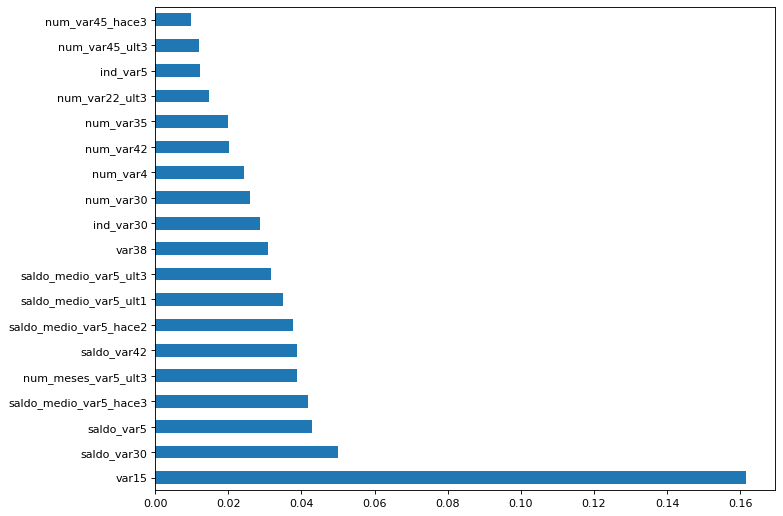

In [46]:
plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importance = pd.Series(rnd_clf.feature_importances_, index= x_train.columns)

feat_importance.nlargest(19).plot(kind='barh')

##### Remove Variáveis com Feature Importance abaixo de 0.01

In [47]:
to_drop_4 = []
# to_drop_4 = feature_scores.loc[lambda x: x <= feature_scores.get(key='random_var')].index[1:]
to_drop_4 = feature_scores.loc[lambda x: x <= 0.01].index

In [48]:
features_4 = features_3.drop(to_drop_4, axis=1)
features_4.head()

,var15,ind_var5,ind_var30,num_var4,num_var30,num_var35,num_var42,saldo_var5,saldo_var30,saldo_var42,num_var22_ult3,num_meses_var5_ult3,num_var45_ult3,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
61553,38,1,1,4,6,12,6,0.3,64139.49,64139.49,3,3,30,129.18,12.60,176.07,105.96,175887.150000
6865,51,1,1,1,3,3,3,1.5,1.50,1.50,3,3,6,1.50,0.72,1.50,1.23,111297.030000
847,23,1,1,1,3,3,3,3.0,3.00,3.00,0,3,0,3.00,0.72,3.00,2.25,117310.979016
40817,23,0,0,0,0,0,0,0.0,0.00,0.00,0,0,0,0.00,0.00,0.00,0.00,80805.900000
71630,23,1,1,1,3,3,3,120.0,120.00,120.00,9,3,12,91.98,68.28,120.00,93.42,124585.620000


##### Modelo Otimizado com Variáveis Selecionadas

In [49]:
#Separa X e Y de treino
x_train_fs = []
y_train_fs = []
x_train_fs = train_set[features_4.columns]
y_train_fs = train_set['TARGET']
x_train_fs.shape, y_train_fs.shape

((53214, 18), (53214,))

In [51]:
rnd_clf_fs = RandomForestClassifier(criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 n_estimators = 100,
 class_weight = 'balanced_subsample', random_state=42)

scores_fs = cross_val_score(rnd_clf_fs, x_train_fs, y_train_fs, scoring='roc_auc', cv=10) #para classificacao o cv ja eh estratificado pela target

print('Media AUC: %.3f' % mean(scores_fs))

Media AUC: 0.820


# **Define Modelo**

In [52]:
#Separa X e Y de treino
x_train_xgb = train_set[features_4.columns]
y_train_xgb = train_set['TARGET']
x_train_xgb.shape, y_train_xgb.shape

((53214, 18), (53214,))

In [53]:
#Separa X e Y de teste
x_test_xgb = test_set[features_4.columns]
y_test_xgb = test_set['TARGET']
x_test_xgb.shape, y_test_xgb.shape

((22806, 18), (22806,))

#### Para Comparação: Acao para todos os clientes

In [54]:
y_acao = pd.Series(np.ones(len(y_train_xgb)),name='TARGET',dtype=int)

auc = roc_auc_score(y_train, y_acao.to_list())
print('ROC AUC: %.3f' % auc)
LR = funcao_lucro(y_train,y_acao.to_list())
print('Lucro Relativo: %.3f' % LR)
print('Lucro Total: %.2f' % (LR*LM))

ROC AUC: 0.500
Lucro Relativo: -1.696
Lucro Total: -321540.00


### XGBoost

#### Usa scale_pos_weight para dados desbalanceados

In [ ]:
#Gerar um modelo com Gradiente Boosting
#implementacao otimizada: XGBoost - rapido, escalonavel e portatil

##### Modelo Base

In [55]:
XGB = XGBClassifier(
   scale_pos_weight = sum(y_train_xgb == 0) / sum(y_train_xgb == 1),
   # max_depth = 6,
   # learning_rate = 0.3,
   random_state = 42
)
XGB.fit(x_train_xgb,y_train_xgb)
y_p_train = XGB.predict(x_train_xgb)
y_p_test = XGB.predict(x_test_xgb)

auc = roc_auc_score(y_train_xgb, y_p_train)
auc_test = roc_auc_score(y_test_xgb, y_p_test)
print('ROC AUC: %.3f' % auc)
print('ROC AUC Teste: %.3f' % auc_test)

LR = funcao_lucro(y_train_xgb, y_p_train)
LR_test = funcao_lucro(y_test_xgb, y_p_test)
print('Lucro Relativo: %.3f' % LR)
print('Lucro Relativo Teste: %.3f' % LR_test)
print('Lucro Total: %.2f' % (LR*LM))
print('Lucro Total Teste: %.2f' % (LR_test*LM))

ROC AUC: 0.892
ROC AUC Teste: 0.737
Lucro Relativo: 0.533
Lucro Relativo Teste: 0.198
Lucro Total: 101030.00
Lucro Total Teste: 37473.73


In [56]:
XGB.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 24.267806267806268,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

#### Define Hiperparâmetros

In [ ]:
# Rodei com max_depth ate 9 e n_estimators ate 100, mas o modelo overfitou

In [57]:
XGB_grid_param = {
    'n_estimators': range(10,100,10),
    'max_depth': range(3,10,3), #default 6
    'learning_rate': [0.001,0.01,0.1], #default 0.3
    'subsample': np.arange(0.25,1.01,0.25), #default 1
    'colsample_bytree': np.arange(0.25,1.01,0.25), #default 1
}

#### Random Search para escolher Hiperparâmetros

In [ ]:
#Faz Random Search para ver se teriamos algum valor melhor para os hiperparametros
#Random Search eh melhor para tunar hiperparametros com XGBoost, pois ele considera algumas combinacoes aleatorias de parametros e nao
# todas (como o Grid Search). Logo, como o XGBoost faz modelos sequenciais e, consequentemente, demora mais, melhor usar o Random. 
#https://xgboost.readthedocs.io/en/stable/parameter.html

In [71]:
random_search = RandomizedSearchCV(estimator=XGB, 
                           param_distributions=XGB_grid_param,
                           n_iter=100,
                           scoring='roc_auc', 
                           n_jobs=-1, 
                           cv=5)

random_search.fit(x_train_xgb,y_train_xgb)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance_type=None,
                                           interaction_constraints='',
                                           learni...
                                           reg_alpha=0, ...),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': array

In [72]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.75,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=42, reg_alpha=0, ...)

In [73]:
random_search.best_params_

{'subsample': 1.0,
 'n_estimators': 50,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.75}

In [74]:
cvres_xgb = random_search.cv_results_
for mean_score, params in zip(cvres_xgb['mean_test_score'],cvres_xgb['params']):
    print(mean_score,params)

0.7898943602636229 {'subsample': 1.0, 'n_estimators': 40, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.25}
0.8079764438171836 {'subsample': 0.75, 'n_estimators': 30, 'max_depth': 9, 'learning_rate': 0.001, 'colsample_bytree': 0.5}
0.8252492412628064 {'subsample': 0.25, 'n_estimators': 80, 'max_depth': 6, 'learning_rate': 0.001, 'colsample_bytree': 0.75}
0.8173051297372496 {'subsample': 0.75, 'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.01, 'colsample_bytree': 0.75}
0.7872784814043821 {'subsample': 0.5, 'n_estimators': 70, 'max_depth': 3, 'learning_rate': 0.001, 'colsample_bytree': 0.25}
0.8240185346831733 {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
0.8045044841178234 {'subsample': 0.25, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.5}
0.8232999216211111 {'subsample': 0.75, 'n_estimators': 80, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.75}
0.8122506973

#### Modelo Final

In [81]:

XGB_final = XGBClassifier(
   scale_pos_weight = sum(y_train_xgb == 0) / sum(y_train_xgb == 1),
   n_estimators = 70, #30 40 60 40
   max_depth = 6, #6 9 12 12
   learning_rate = 0.01, #0.01 0.1 0.01 0.001
   colsample_bytree = 0.75,
   subsample = 0.25, #0.25 0.25 0.25 0.5
   random_state = 42
)
XGB_final.fit(x_train_xgb,y_train_xgb)
y_p_train = XGB_final.predict(x_train_xgb)
y_p_test = XGB_final.predict(x_test_xgb)

auc = roc_auc_score(y_train_xgb, y_p_train)
auc_test = roc_auc_score(y_test_xgb, y_p_test)
print('ROC AUC: %.3f' % auc)
print('ROC AUC Teste: %.3f' % auc_test)

LR = funcao_lucro(y_train_xgb, y_p_train)
LR_test = funcao_lucro(y_test_xgb, y_p_test)
print('Lucro Relativo: %.3f' % LR)
print('Lucro Relativo Teste: %.3f' % LR_test)
print('Lucro Total: %.2f' % (LR*LM))
print('Lucro Total Teste: %.2f' % (LR_test*LM))

ROC AUC: 0.773
ROC AUC Teste: 0.759
Lucro Relativo: 0.239
Lucro Relativo Teste: 0.204
Lucro Total: 45330.00
Lucro Total Teste: 38687.83


#### Customiza ponto de corte

In [63]:
prob_treino = XGB_final.predict_proba(x_train_xgb)[:,1]
df_avaliacao = pd.DataFrame({'Probabilidade' : prob_treino, 'TARGET' : y_train_xgb})

In [66]:
resumo_metricas = []

for corte in np.arange(0.01, 1, 0.01):
    
    # Cria o predict baseado no valor do corte
    df_avaliacao['TARGET_pred'] = (df_avaliacao['Probabilidade'] >= corte).astype('int')
    
    # Calcula o lucro por cliente
    LR = funcao_lucro(df_avaliacao['TARGET'], df_avaliacao['TARGET_pred'])
    lucro_total = LR*LM

    resumo_metricas.append([corte, LR, lucro_total])

In [67]:
resumo_metricas = pd.DataFrame(resumo_metricas, columns=["corte", "lucro_relativo", "lucro"])
resumo_metricas

,corte,lucro_relativo,lucro
0,0.01,-1.696423,-321540.0
1,0.02,-1.696423,-321540.0
2,0.03,-1.696423,-321540.0
3,0.04,-1.696159,-321490.0
4,0.05,-1.657856,-314230.0
...,...,...,...
94,0.95,0.000000,0.0
95,0.96,0.000000,0.0
96,0.97,0.000000,0.0
97,0.98,0.000000,0.0


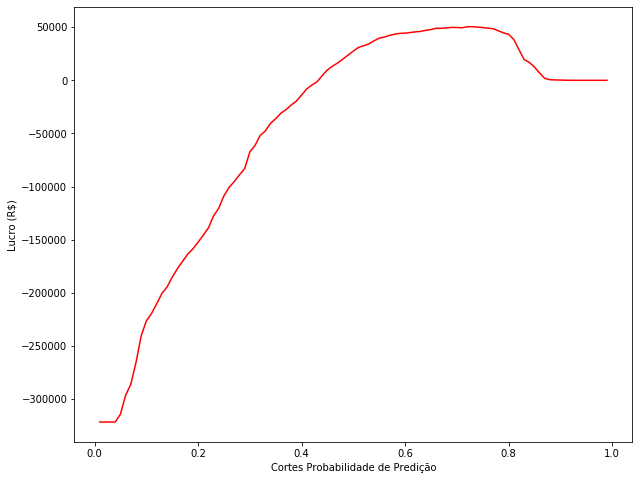

In [68]:
plt.figure(figsize = (10,8))
plt.plot(resumo_metricas['corte'], resumo_metricas['lucro'], color = 'red')
# plt.xticks(resumo_metricas[corte],)
plt.xlabel("Cortes Probabilidade de Predição")
plt.ylabel("Lucro (R$)")
plt.show()

In [69]:
resumo_metricas.loc[resumo_metricas.lucro == max(resumo_metricas['lucro'])]

,corte,lucro_relativo,lucro
72,0.73,0.266171,50450.0


In [70]:
prob_teste = XGB_final.predict_proba(x_test_xgb)[:,1]
pred_final = pd.DataFrame({'Probabilidade' : prob_teste, 'TARGET' : y_test_xgb})
pred_final['TARGET_pred'] = (pred_final['Probabilidade'] >= 0.51).astype('int')

LM_test = y_test_xgb.sum()*90

LR_test = funcao_lucro(pred_final['TARGET'], pred_final['TARGET_pred'])
lucro_total = LR_test*LM_test

print("Lucro: R$", lucro_total)
print("Lucro Relativo: {:0.2%}".format(LR_test))

Lucro: R$ 11560.0
Lucro Relativo: 14.24%


In [ ]:
prob_treino = XGB_final.predict_proba(x_train_xgb)[:,1]
df_avaliacao = pd.DataFrame({'Probabilidade' : prob_treino, 'TARGET' : y_train_xgb})

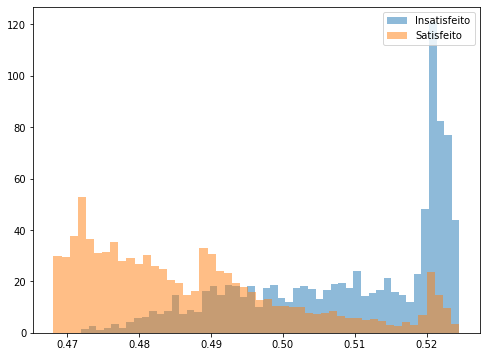

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(df_avaliacao.loc[(df_avaliacao.TARGET == 1)]['Probabilidade'], bins=50, density = True , alpha=0.5, label="Insatisfeito")
plt.hist(df_avaliacao.loc[(df_avaliacao.TARGET == 0)]['Probabilidade'], bins=50, density = True , alpha=0.5, label="Satisfeito")

plt.legend(loc='upper right')